# Graficos

## RTT over hops

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import taller2
import seaborn as sns
import pandas as pd # name a more iconic duo

In [53]:
sns.set_style("whitegrid")

In [54]:
# Levantamos los hops de alguna IP, extendemos con info geolocalizada, y graficamos
def get_df(ip: str):
    _, stats = taller2.deserialize(ip)
    taller2.extend_with_geo(stats)
    taller2.d_rtt(stats)
    
    df = pd.DataFrame(stats)
    df["hop"] = df.index
    return df[df["hop"] >= 1]

In [55]:
IP_DELHI = "14.139.45.149"
IP_CMU = "128.2.42.52"
IP_OSAKA = "133.1.138.1"

df = get_df(IP_DELHI)


RTT por saltos


In [56]:
df

,IP,median,sd,d_rtt,city,country_name,org,hop
1,192.168.43.1,55.418491,27.696722,38.056850,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,172.25.199.97,93.475342,2.777646,102.035761,NaN,NaN,NaN,3
4,181.96.96.181,83.448410,87.769196,112.062693,Buenos Aires,Argentina,AS7303 Telecom Argentina S.A.,4
5,181.88.68.142,83.366156,12.460104,112.144947,Buenos Aires,Argentina,AS7303 Telecom Argentina S.A.,5
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,181.96.113.234,195.511103,0.000000,92.077971,New York City,United States,AS7303 Telecom Argentina S.A.,7
8,195.22.220.56,87.491512,15.567708,200.097561,Buenos Aires,Argentina,AS6762 TELECOM ITALIA SPARKLE S.p.A.,8
9,195.22.209.220,287.589073,11.523454,19.458771,London,United Kingdom,AS6762 TELECOM ITALIA SPARKLE S.p.A.,9
10,149.3.183.137,307.047844,18.788415,136.466503,Rome,Italy,AS6762 TELECOM ITALIA SPARKLE S.p.A.,10


In [65]:
def rtt_over_hops(df: pd.DataFrame, hops: int):
    ax = sns.scatterplot(data=df[df["hop"] <= hops], x="hop", y="median", hue="country_name")
    ax.set(xlabel='Hop', ylabel='RTT media (ms)')
    ax.set_title("RTT para cada hop")
    ax.set_xticks(range(1,hops+1))

def d_rtt_over_hops(df: pd.DataFrame, hops: int):
    ax = sns.scatterplot(data=df[df["hop"] <= hops], x="hop", y="d_rtt", hue="country_name")
    ax.set(xlabel='Hop', ylabel='RTT media (ms)')
    ax.set_title("RTT para cada hop")
    ax.set_xticks(range(1,hops+1))

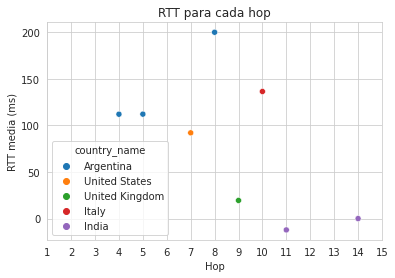

In [66]:
#rtt_over_hops(df, 15)
d_rtt_over_hops(df, 15)